In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import mglearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score

np.random.seed(0)

# feature scaling
num_classes = 10
data, target = load_digits(return_X_y=True)
target_names = load_digits().target_names 
num_features = data.shape[1]


In [10]:
sliced_data = data[target < 5]

display(sliced_data)
print(sliced_data.shape)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]])

(901, 64)


In [11]:
sliced_target = target[target < 5]
display(sliced_target)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 0, 4, 1, 3, 1, 0,
       0, 2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 4, 4, 1, 0, 2, 2, 0, 0, 1, 3, 2,
       1, 4, 3, 1, 3, 1, 4, 3, 1, 4, 0, 3, 1, 4, 4, 2, 2, 2, 4, 4, 0, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 0, 4, 1, 3, 1, 0, 0,
       2, 2, 2, 0, 1, 2, 3, 3, 3, 3, 4, 4, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1,
       3, 1, 3, 1, 4, 3, 1, 4, 0, 3, 1, 4, 4, 2, 2, 2, 4, 4, 0, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 0, 4, 1, 3, 1, 0, 0, 2, 2,
       2, 0, 1, 2, 3, 3, 3, 3, 4, 4, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 4, 3,
       1, 3, 1, 4, 3, 1, 4, 0, 3, 1, 4, 4, 2, 2, 2, 4, 4, 0, 3, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 0, 4, 1, 3, 1, 0, 0, 2, 2,
       2, 0, 1, 2, 3, 3, 3, 3, 4, 4, 1, 0, 2, 2, 0, 0, 1, 3, 2, 1, 4, 3,
       1, 3, 1, 4, 3, 1, 4, 0, 3, 1, 4, 4, 2, 2, 2, 4, 4, 0, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 0, 4, 1, 3, 1, 0, 0, 2, 2, 2,
       0, 1, 2, 3, 3, 3, 3, 4, 4, 1, 0, 2, 2, 0, 0,

In [12]:
scaler = StandardScaler() 
scaler.fit(sliced_data)
X_scaled = scaler.transform(sliced_data)
num_classes = 5

Adjust Rand index is 0.7949727403398167


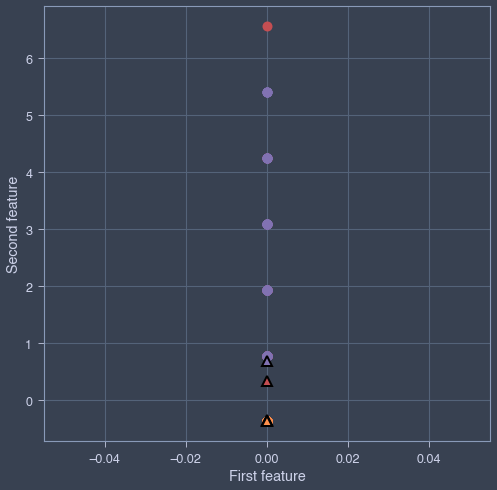

In [13]:
# kmeans without pca
kmeans = KMeans(n_clusters= num_classes, random_state=0) 
kmeans.fit(X_scaled)

print("Adjust Rand index is {}".format(adjusted_rand_score(sliced_target, kmeans.labels_)))

plt.figure(figsize=(8, 8))
plt.gca().set_aspect("auto")
plt.xlabel("First feature")
plt.ylabel("Second feature")
mglearn.discrete_scatter(X_scaled[:, 0], X_scaled[:, 1], kmeans.labels_, markers='o') 
mglearn.discrete_scatter(\
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], np.arange(num_classes), markers='^', markeredgewidth=2)

Original shape: (901, 64)
Reduced shape: (901, 64)


Text(0, 0.5, 'Second principal component')

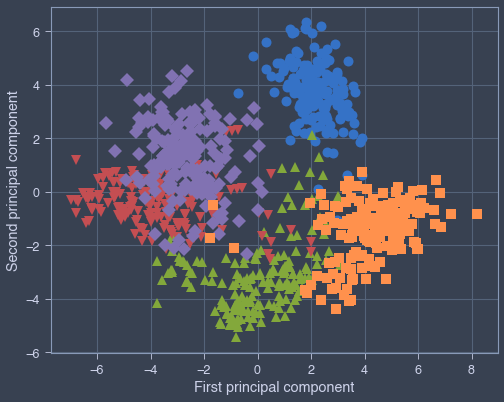

In [14]:
# Apply pca to scaled data

pca = PCA()
pca.fit(X_scaled)
X_scaled_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_scaled_pca.shape)))
#print("Explained variance ratio: {}".format(pca.explained_variance_ratio_))

# plot the first and second PCs
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], sliced_target) 
#plt.legend(target_names, loc="best") 
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")




In [15]:
# external evaluation


adRand = np.zeros((num_features, 1))
FM = np.zeros((num_features, 1))
for i in np.arange(num_features):
    # build the clustering model for the first i PCs
    pca_kmeans = KMeans(n_clusters=num_classes, random_state=0) 
    pca_kmeans.fit(X_scaled_pca[:, :i+1])
    adRand[i] = adjusted_rand_score(sliced_target, pca_kmeans.labels_)
    FM[i] = fowlkes_mallows_score(sliced_target, pca_kmeans.labels_) 
    


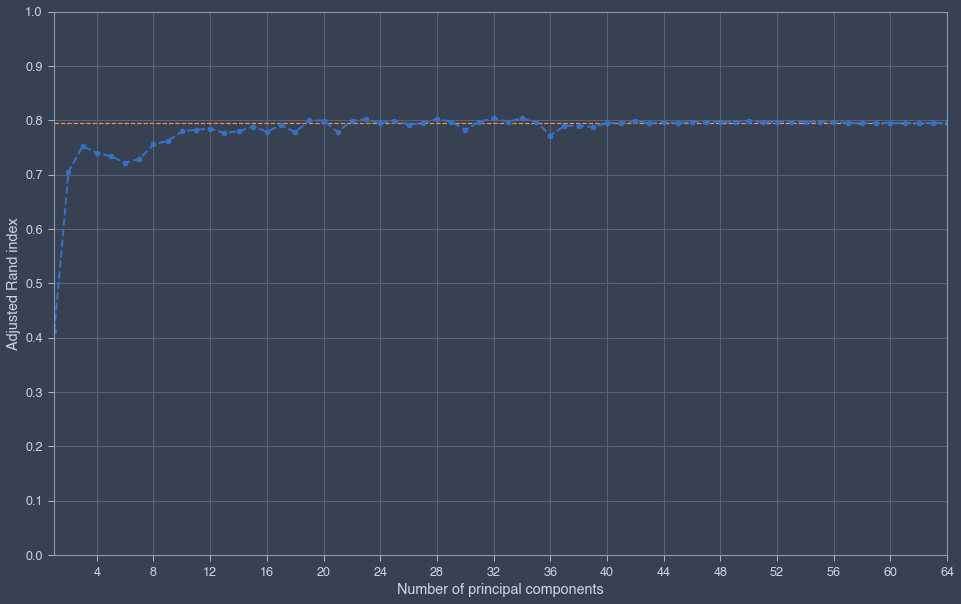

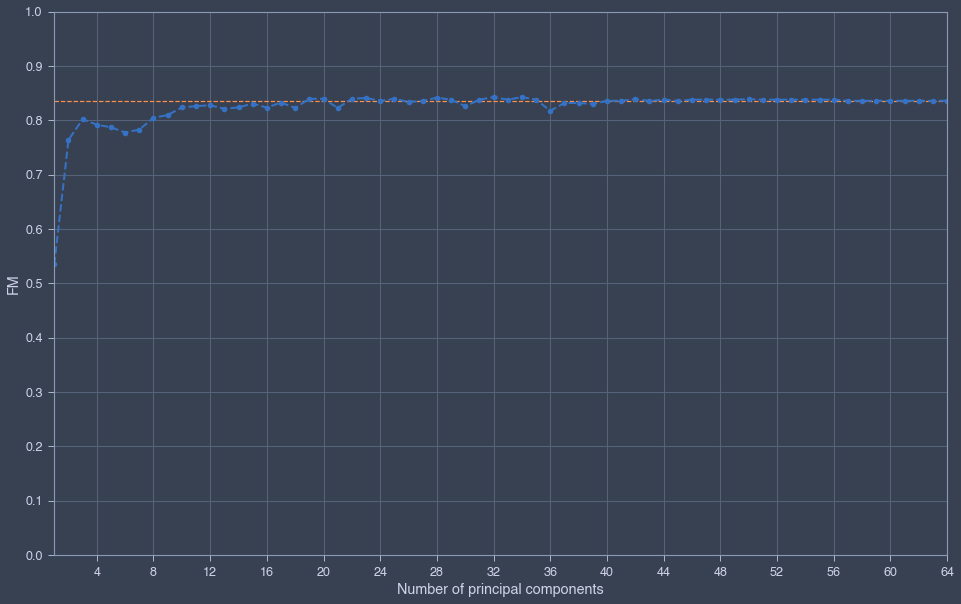

In [16]:
plt.figure(figsize=(16, 10))
plt.ylim(0,1)
plt.xlim(1, num_features)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("Adjusted Rand index")
plt.hlines(adjusted_rand_score(sliced_target, kmeans.labels_), 1, num_features, color = "y",linestyle='--')
plt.plot(np.arange(1, num_features+1), adRand, linestyle='--', marker='o', linewidth=2)
x_major_locator = plt.MultipleLocator(4)
y_major_locator = plt.MultipleLocator(0.1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)

#plt.title()

plt.figure(figsize=(16, 10))
plt.ylim(0,1)
plt.xlim(1, num_features)
plt.gca().set_aspect("auto")
plt.xlabel("Number of principal components")
plt.ylabel("FM")
plt.hlines(fowlkes_mallows_score(sliced_target, kmeans.labels_), 1, num_features, color = "y",linestyle='--')
plt.plot(np.arange(1, num_features+1), FM, linestyle='--', marker='o', linewidth=2)
x_major_locator = plt.MultipleLocator(4)
y_major_locator = plt.MultipleLocator(0.1)
plt.gca().xaxis.set_major_locator(x_major_locator)
plt.gca().yaxis.set_major_locator(y_major_locator)